## Normal density recovery using the COS method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
def COSDensity(cf,x,N,a,b):
    i = complex(0.0,1.0) #assigning i=sqrt(-1)
    k = np.linspace(0,N-1,N)
    u = k * np.pi / (b-a)
        
    # F_k coefficients
    F_k    = 2.0 / (b - a) * np.real(cf(u) * np.exp(-i * u * a));
    F_k[0] = F_k[0] * 0.5; # adjustment for the first term
    
    # Final calculation
    f_X = np.matmul(F_k , np.cos(np.outer(u, x - a )))
        
    # We output only the first row
    return f_X

In [3]:
# main calculation
i = complex(0.0, 1.0) #assigning i=sqrt(-1)
    
# Setting for the COS method 
a = -10.0
b = 10.0
    
# Define the range for the expansion points
N = [2**x for x in range(2,7,1)]
    
# Setting for normal distribution
mu = 0.0
sigma = 1.0 
        
# Define characteristic function for the normal distribution
cF = lambda u : np.exp(i * mu * u - 0.5 * np.power(sigma,2.0) * np.power(u,2.0));
    
# Define the domain for density
x = np.linspace(-5.0,5,51)
f_XExact = st.norm.pdf(x,mu,sigma)

For 4 expanansion terms the error is 0.25375729966450533
For 8 expanansion terms the error is 0.10753236532743599
For 16 expanansion terms the error is 0.0071750529323375
For 32 expanansion terms the error is 4.0376051230195387e-07
For 64 expanansion terms the error is 2.220446049250313e-16


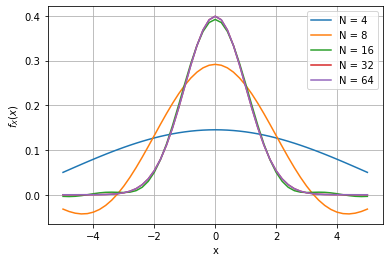

In [4]:
plt.figure(1)
plt.grid()
plt.xlabel("x")
plt.ylabel("$f_X(x)$")
for n in N:
    f_X = COSDensity(cF,x,n,a,b)
    error = np.max(np.abs(f_X-f_XExact))
    print("For {0} expanansion terms the error is {1}".format(n,error))
        
    plt.plot(x,f_X, label = 'N = {0}'.format(n));
plt.legend();

## LogNormal density recovery using the COS method

In [7]:
# main calculation
i = complex(0.0, 1.0) #assigning i=sqrt(-1)
    
# Setting for the COS method 
a = -10.0
b = 10.0
    
# Define the range for the expansion points
N = [16, 64, 128]  

# Setting for normal distribution
mu = 0.5
sigma = 0.2 
        
# Define characteristic function for the normal distribution
cF = lambda u : np.exp(i * mu * u - 0.5 * np.power(sigma,2.0) * np.power(u,2.0));
    
# Define the domain for density
y = np.linspace(0.05,5,1000)
f_YExact = st.norm.pdf(y,np.exp(mu),sigma)

For 16 expanansion terms the error is 1.5329627122739493
For 64 expanansion terms the error is 0.8446797675199105
For 128 expanansion terms the error is 0.7916332920588476


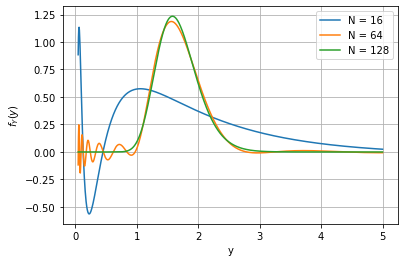

In [8]:
plt.figure(2)
plt.grid()
plt.xlabel("y")
plt.ylabel("$f_Y(y)$")
for n in N:
    f_Y = 1/y * COSDensity(cF,np.log(y),n,a,b)
    error = np.max(np.abs(f_Y-f_YExact))
    print("For {0} expanansion terms the error is {1}".format(n,error))

    plt.plot(y,f_Y, label = 'N = {0}'.format(n));
plt.legend();